<h1> Boston Housing </h1>

Author: Vaasudevan Srinivasan <br>
Created on: July 12, 2021

[nbviewer](https://nbviewer.jupyter.org/github/PacktPublishing/Mastering-Keras/blob/master/Module%202.1_%20MLPs.ipynb)

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.regularizers import l2
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

tf.__version__

'2.5.0'

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape, x_test.shape)

(404, 13) (102, 13)


# Model 1

In [ ]:
model = Sequential([
    Dense(input_dim=x_train.shape[1], units=14, activation='relu'),
    Dense(units=6, activation='relu'),
    Dense(units=1, activation='linear')             
])

model.compile(loss='mean_squared_error', optimizer='adam')
h = model.fit(x_train, y_train, epochs=1000, verbose=0,
              callbacks=[TqdmCallback(verbose=0)])

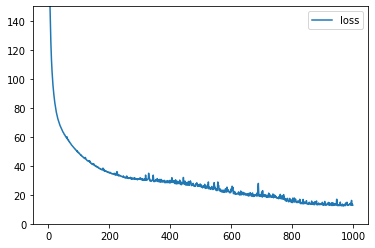

In [ ]:
pd.DataFrame(h.history).plot()
plt.gca().set_ylim(0, 150);

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 29.3190


29.319013595581055

# Model 2

In [ ]:
inputs = Input(shape=(x_train.shape[1], ))
hidden1 = Dense(14, activation='relu', kernel_regularizer=l2(.1))(inputs)
hidden2 = Dense(6, activation='relu', kernel_regularizer=l2(.1))(hidden1)
outputs = Dense(1, activation='linear')(hidden2)
model = Model(inputs, outputs)

model.compile(loss='mean_squared_error', optimizer='adam')
h = model.fit(x_train, y_train, epochs=1000, verbose=0,
              callbacks=[TqdmCallback(verbose=0)])

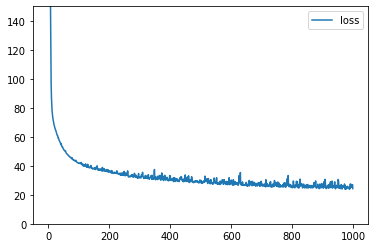

In [ ]:
pd.DataFrame(h.history).plot()
plt.gca().set_ylim(0, 150);

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 24.7823


24.782251358032227

# Model 3

In [ ]:
inputs = Input(shape=(x_train.shape[1], ))

hidden1 = Dense(14, use_bias=False, kernel_regularizer=l2(.1))(inputs)
batch1 = BatchNormalization()(hidden1)
act1 = Activation('relu')(batch1)

hidden2 = Dense(6, use_bias=False, kernel_regularizer=l2(.1))(act1)
batch2 = BatchNormalization()(hidden2)
act2 = Activation('relu')(batch2)

outputs = Dense(1, activation='linear')(hidden2)

early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=15,
                               verbose=1,
                               restore_best_weights=True)

model = Model(inputs, outputs)
model.compile(loss='mean_squared_error', optimizer='adam')
h = model.fit(x_train, y_train, epochs=1000, verbose=0,
              validation_split=0.2,
              callbacks=[early_stopping, TqdmCallback(verbose=0)])

Restoring model weights from the end of the best epoch.
Epoch 00092: early stopping



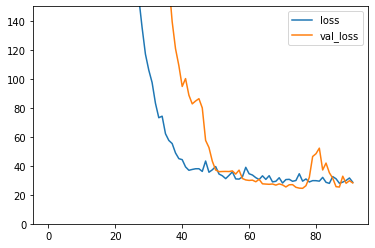

In [ ]:
pd.DataFrame(h.history).plot()
plt.gca().set_ylim(0, 150);

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 33.2342


33.23421859741211